In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# load data
df = pd.read_json('https://takehomedata.dokku.railslabs.com/companies.json')

In [ ]:
# Ideas
- Get lat / long for location and map where most of the locations are
- 

In [122]:
df.sample()

,index,approved_at,name,redeemed_voucher_count,voucher_count,amount,soli,orders_count,voucher_ratio
9,15,2020-03-27 14:14:19+00:00,"Weller, Uhlig and Kinadeter",135.0,154.0,5585.9,285.0,92,88.0


In [99]:
# get df dimension
df.shape

(699, 7)

In [100]:
# check dtypes
df.dtypes

name                                   object
redeemed_voucher_count                float64
voucher_count                         float64
amount                                  int64
soli                                    int64
orders_count                            int64
approved_at               datetime64[ns, UTC]
dtype: object

In [101]:
# convert cent to euro
df.amount = df.amount/100
df.soli = df.soli/100

In [102]:
# calculate voucher ratio
df['voucher_ratio'] = round(df.redeemed_voucher_count / df.voucher_count *100)

In [103]:
df.sample()

,name,redeemed_voucher_count,voucher_count,amount,soli,orders_count,approved_at,voucher_ratio
407,Meyer - Abraham,4.0,4.0,200.0,0.0,1,2020-04-12 11:37:32+00:00,100.0


### Admin-Kennzahlen

In [104]:
df.voucher_count.sum()

23776.0

In [105]:
df.redeemed_voucher_count.sum()

3893.0

In [106]:
round(df.amount.sum())

555939

In [107]:
round(df.soli.sum())

92574

In [108]:
df = df.set_index('approved_at')

In [109]:
# Group data by month
g = df.groupby(pd.Grouper(freq="M"))
g.sum()

,redeemed_voucher_count,voucher_count,amount,soli,orders_count,voucher_ratio
approved_at,,,,,,
2020-03-31 00:00:00+00:00,3306.0,18670.0,426108.10,64827.88,10991,7509.0
2020-04-30 00:00:00+00:00,587.0,4819.0,121484.42,24943.77,2911,3340.0
2020-05-31 00:00:00+00:00,0.0,283.0,7836.30,2552.30,165,0.0
2020-06-30 00:00:00+00:00,0.0,4.0,510.00,250.00,5,0.0


In [110]:
# top 10 soli
df.sort_values(by='soli', ascending=False).head()

,name,redeemed_voucher_count,voucher_count,amount,soli,orders_count,voucher_ratio
approved_at,,,,,,,
2020-03-24 10:15:54+00:00,Heiser OHG,19.0,270.0,18957.0,7987.0,238,7.0
2020-03-28 19:50:34+00:00,Ullmann GmbH & Co. KG,0.0,338.0,7977.0,2784.0,175,0.0
2020-03-26 09:52:32+00:00,Nodler - Cotthardt,109.0,465.0,16379.1,2539.1,227,23.0
2020-04-03 13:10:27+00:00,Geyer - Kobs,12.0,389.0,4891.0,2168.0,154,3.0
2020-05-03 16:42:23+00:00,Pöche - Vogt,0.0,161.0,4718.7,1998.7,109,0.0


In [111]:
# Who got more than 1k soli?
df[df.soli > 1000].shape

(12, 7)

In [119]:
# Who has more than 10 redeemed voucher and best voucher ratio 
df = df[df.redeemed_voucher_count > 10]
df.sort_values(by=['voucher_ratio'], ascending=False).head(10)

,approved_at,name,redeemed_voucher_count,voucher_count,amount,soli,orders_count,voucher_ratio
186,2020-04-02 09:54:28+00:00,Reif AG,26.0,26.0,760.00,20.00,6,100.0
148,2020-03-31 11:54:04+00:00,Blume Gruppe,36.0,38.0,1015.00,205.00,21,95.0
406,2020-03-26 13:36:52+00:00,"Kahles, Knippel and Tremmel",41.0,46.0,205.00,21.00,9,89.0
15,2020-03-27 14:14:19+00:00,"Weller, Uhlig and Kinadeter",135.0,154.0,5585.90,285.00,92,88.0
40,2020-03-30 19:26:46+00:00,Rheder AG,33.0,39.0,2932.00,107.00,36,85.0
190,2020-04-06 14:19:58+00:00,Lepthin - Malucha,15.0,19.0,755.00,65.00,12,79.0
97,2020-04-28 13:36:30+00:00,Horak Gruppe,44.0,58.0,1416.00,31.40,31,76.0
276,2020-04-14 07:15:34+00:00,"Slotta, Steffny and Tittman",41.0,55.0,437.00,74.00,15,75.0
341,2020-03-25 11:42:02+00:00,"Paesler, Wyludda and Hasler",12.0,16.0,310.00,10.00,10,75.0
31,2020-03-26 11:21:26+00:00,"Brenner, Zender and Lutz",58.0,82.0,3478.01,203.01,68,71.0


In [120]:
df = df.reset_index()

<AxesSubplot:xlabel='approved_at', ylabel='amount'>

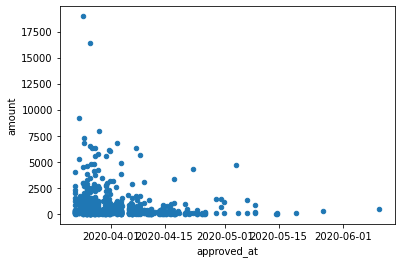

In [115]:
df.plot.scatter(x = 'approved_at', y = 'amount')

## Firmen-Infos

In [ ]:
firma = input('Gib eine Firma ein')

In [ ]:
df = df[df.name.str.contains(firma)]

In [ ]:
df

In [ ]:
print(f'{df.name.item()}\nVerkaufte Gutscheine: {df.voucher_count.item()}\nEingelöste Gutscheine: {df.redeemed_voucher_count.item()}\nEinnahmen: {df.amount.item()/100}\nSpenden: {df.soli.item()/100}\nBestellungen: {df.orders_count.item()}')